# __1. Thư viện__

In [73]:
# from google.colab import drive
# drive.mount('/content/drive')

In [74]:
# %cd "/content/drive/MyDrive/Colab Notebooks/Code/NopThay"

In [75]:
# !pip install keras-tuner
# !pip install import-ipynb

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

%matplotlib inline

In [2]:
import import_ipynb
import MLTunning as MLT

# __2. Vectorize - TFIDF__

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

def apply_tfidf(X_train, X_test):
    """Applies TF-IDF vectorization to the training and testing datasets.

    Args:
        X_train: Training data (list of text documents).
        X_test: Testing data (list of text documents).

    Returns:
        Tuple: (X_train_tfidf, X_test_tfidf), where X_train_tfidf and X_test_tfidf
               are the TF-IDF vectorized representations of the training and testing data.
    """
    vectorizer = TfidfVectorizer()
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)
    return X_train_tfidf, X_test_tfidf

# __3. Phân tích câu dài__


### ___3.1. Đọc bộ dữ liệu full đã được xử lý___

In [79]:
file_path = r'C:\\Users\\Nguyen_Thanh_Vinh\\Downloads\\NopThay\\preprocessed_data.xlsx'
df = pd.read_excel(file_path)
print(df.head())

                                    content_comments  \
0  thay đổi coment tăng  size hãy làm như bạn muố...   
1  quần dày mỗi lần size nhỏ nhắn tin cửa hàng đổ...   
2  đã nhận được đóng gói màu đúng mẫu đúng sau sẽ...   
3  đã nhận được đóng gói sizesẽ khả năng quay lại...   
4  hình ảnh nhận xu và quan đơn giản thôi mua nhi...   

                                         comment_eng  sentiment  \
0  Change the cmt to increase 1 size. Please do a...          0   
1  thick pants\nEvery time the size is small, mes...          0   
2  Received the goods...shop packaged quickly...r...          1   
3  Received the goods...shop packaged quickly...r...          1   
4  The picture of receipt of coin and quan is sim...          0   

                                       word_tokenize  
0  thay_đổi coment tăng size hãy làm như bạn muốn...  
1  quần dày mỗi lần size nhỏ_nhắn tin cửa_hàng đổ...  
2  đã nhận được đóng_gói màu đúng mẫu đúng sau sẽ...  
3  đã nhận được đóng_gói sizesẽ khả_năng

### ___3.2. Vectorize - TFIDF - Full___

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Prepare the data
X = df['word_tokenize']
y = df['sentiment']
# Before splitting, drop rows with NaN in 'word_tokenize'
X = X.dropna()  # Drop rows with NaN values in 'word_tokenize' column
y = y[X.index]  # Align y with the dropped rows in X

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'df' is not defined

In [81]:
X_train_vec, X_test_vec = apply_tfidf(X_train, X_test)

### ___3.3. Mô hình ML - Logistic regression - Full___

Best hyperparameters (Logistic regression): {'solver': 'saga', 'penalty': 'l2', 'C': 100}
Best score (Logistic regression): 0.9109371618209364
Best Logistic regression Accuracy: 0.9375
Best Logistic regression Precision: 0.9272727272727272
Best Logistic regression Recall: 0.9532710280373832
Best Logistic regression AUC: 0.9381261595547311

Classification Report:  LogisticRegression
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        98
           1       0.95      0.93      0.94       110

    accuracy                           0.94       208
   macro avg       0.94      0.94      0.94       208
weighted avg       0.94      0.94      0.94       208

ROC_AUC_SCORE is  0.9381261595547311


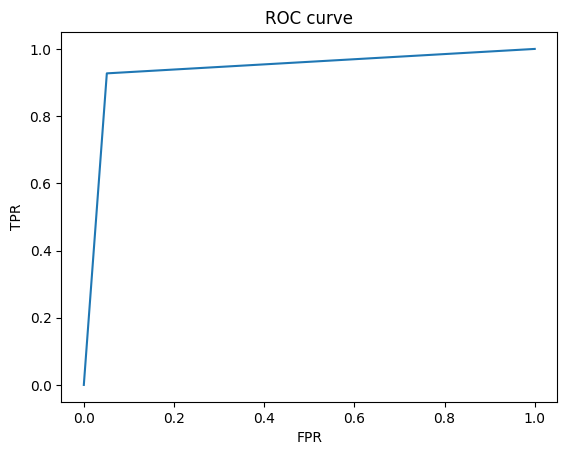

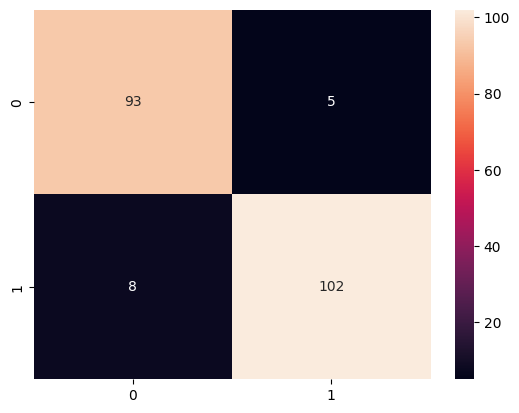

In [82]:
logreg_results = MLT.tune_logistic_regression(X_train_vec, y_train, X_test_vec, y_test)

In [83]:
best_logreg_model_full = logreg_results[0]

### ___3.4. Mô hình ML - RandomForest - Full___

c:\Users\Nguyen_Thanh_Vinh\anaconda3\envs\RP_Env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Nguyen_Thanh_Vinh\anaconda3\envs\RP_Env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Nguyen_Thanh_Vinh\anaconda3\envs\RP_Env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Nguyen_Thanh_Vinh\anaconda3\envs\RP_Env\Lib\site-packages\sklearn\base.py", line 666, in _validat

Best hyperparameters (RandomForestClassifier): {'max_depth': 21, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 232}
Best score (RandomForestClassifier): 0.909703484597071
Best Random Forest Accuracy: 0.9230769230769231
Best Random Forest Precision: 0.9
Best Random Forest Recall: 0.9519230769230769
Best Random Forest AUC: 0.9244897959183673
Classification Report:  RandomForestClassifier
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        98
           1       0.95      0.90      0.93       110

    accuracy                           0.92       208
   macro avg       0.92      0.92      0.92       208
weighted avg       0.92      0.92      0.92       208

ROC_AUC_SCORE is  0.9244897959183673


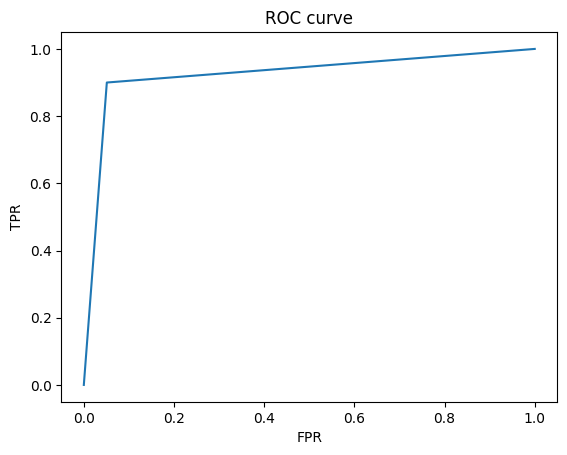

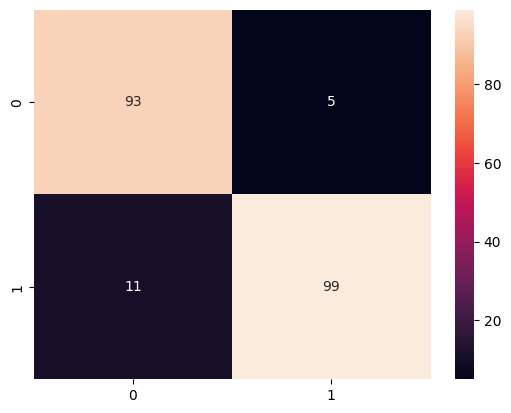

In [84]:
rf_results = MLT.tune_random_forest(X_train_vec, y_train, X_test_vec, y_test)

In [85]:
best_rf_model_full = rf_results[0]

### ___3.5. Mô hình ML - NavieBayes - Full___

Best hyperparameters (MultinomialNB): {'alpha': 1.038748454822801}
Best score (MultinomialNB): 0.8976841497727437
Best Navie Bayes Accuracy: 0.9182692307692307
Best Naive Bayes Precision: 0.9636363636363636
Best Navie Bayes Recall: 0.8907563025210085
Best Naive Bayes AUC: 0.9154916512059369
Classification Report:  MultinomialNB
              precision    recall  f1-score   support

           0       0.96      0.87      0.91        98
           1       0.89      0.96      0.93       110

    accuracy                           0.92       208
   macro avg       0.92      0.92      0.92       208
weighted avg       0.92      0.92      0.92       208

ROC_AUC_SCORE is  0.9154916512059369


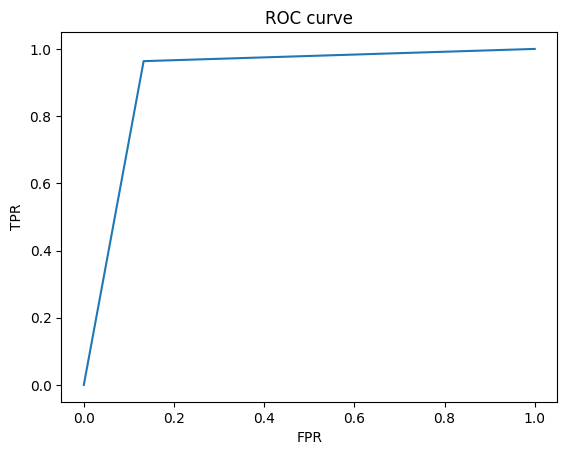

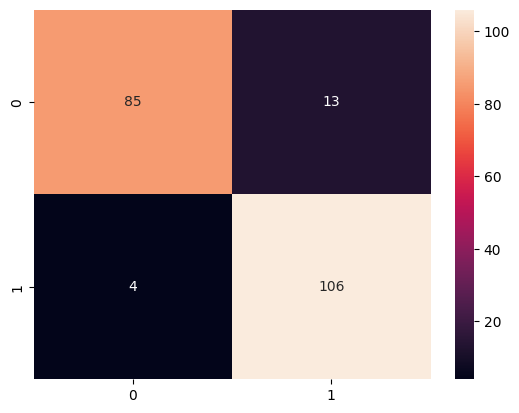

In [86]:
nb_results = MLT.tune_multinomial_nb(X_train_vec, y_train, X_test_vec, y_test)

In [87]:
best_nb_results_full = nb_results[0]

### ___So sánh 3 mô hình ML___

### ___3.6. Mô hình DL - LSTM - Full___

In [43]:
X_train_dense = X_train_vec.toarray()
X_test_dense = X_test_vec.toarray()

In [44]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, GlobalAveragePooling1D, Dense, Input
from tensorflow.keras.optimizers import Adam
import os
from sklearn.preprocessing import LabelEncoder

def build_model(hp):
    model = Sequential()

    model.add(Input(shape=(1020, 1)))  # Sử dụng 1020 đặc trưng làm chuỗi đầu vào

    for _ in range(hp.Int('num_lstm_layers', 1, 3)):  # Từ 1 đến 3 lớp LSTM
        model.add(LSTM(hp.Int('lstm_units', 32, 128, step=32), return_sequences=True))
        model.add(Dropout(0.5))

    model.add(GlobalAveragePooling1D())  # Tổng hợp thông tin từ các bước
    model.add(Dense(1, activation='sigmoid'))  # Phân loại nhị phân (0 hoặc 1)

    model.compile(
        loss='binary_crossentropy',  # Sử dụng loss nhị phân cho bài toán phân loại 2 lớp
        optimizer=Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
        metrics=['accuracy']
    )

    return model

# Đường dẫn và tên dự án
base_dir = r'sentiment_NK4'
project_name = 'sentiment_NLP4'
directory = os.path.join(base_dir, project_name)

# Kiểm tra và tạo thư mục nếu chưa có
if not os.path.exists(directory):
    os.makedirs(directory)
    print(f"Created directory: {directory}")
else:
    print(f"Directory already exists: {directory}")

# Tuner tìm kiếm siêu tham số
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',  # Tối ưu hóa theo độ chính xác trên tập validation
    max_trials=2,  # Số lần thử
    executions_per_trial=1,  # Mỗi thử nghiệm sẽ chạy 1 lần
    directory=base_dir,
    project_name=project_name
)

# Tiến hành tìm kiếm siêu tham số
tuner.search(X_train_dense, y_train, epochs=5, validation_data=(X_test_dense, y_test))

# Lấy các siêu tham số tốt nhất
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters found:")
print(f"LSTM units: {best_hps.get('lstm_units')}")
print(f"Number of LSTM layers: {best_hps.get('num_lstm_layers')}")
print(f"Learning rate: {best_hps.get('learning_rate')}")

Trial 2 Complete [00h 29m 35s]
val_accuracy: 0.5288461446762085

Best val_accuracy So Far: 0.5288461446762085
Total elapsed time: 00h 56m 39s
Best hyperparameters found:
LSTM units: 32
Number of LSTM layers: 3
Learning rate: 0.00023948972884503826


# __4. Phân tích câu ngắn__

### ___4.1. Đọc bộ dữ liệu ngắn đã được xử lý___

In [6]:
file_path1 = r'C:\\Users\\Nguyen_Thanh_Vinh\\Downloads\\NopThay\\preprocessed_data1.xlsx'
df1 = pd.read_excel(file_path1)
print(df1.head())

   Unnamed: 0                                            comment  \
0         3.0                                           thun dày   
1         4.0                                    túi có khóa kéo   
2         NaN  mỗi lần size nhỏ nhắn cửa hàng đổi size to hơn...   
3         8.0                                           quần dày   
4         9.0                                  đã nhận được hàng   

   sentiment_manual                                      word_tokenize  
0                 1                                           thun dày  
1                 1                                    túi có khóa kéo  
2                 0  mỗi lần size nhỏ_nhắn cửa_hàng đổi size to hơn...  
3                 1                                           quần dày  
4                 1                                  đã nhận được hàng  


### ___4.2. Vectorize - TFIDF - Split___

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Prepare the data
X1 = df1['word_tokenize']
y1 = df1['sentiment_manual']
# Before splitting, drop rows with NaN in 'word_tokenize'
X1 = df1['word_tokenize'].dropna()
y1 = df1.loc[X1.index, 'sentiment_manual']  # Chỉ giữ lại các dòng của y1 tương ứng với X1

# Split data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [8]:
X_train_vec1, X_test_vec1 = apply_tfidf(X_train1, X_test1)

### ___4.3. Mô hình ML - Logistic Regression___

Best hyperparameters (Logistic regression): {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}
Best score (Logistic regression): 0.8880358989430602
Best Logistic regression Accuracy: 0.8843657817109144
Best Logistic regression Precision: 0.9314741035856574
Best Logistic regression Recall: 0.9139953088350273
Best Logistic regression AUC: 0.8407370517928288

Classification Report:  LogisticRegression
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       440
           1       0.91      0.93      0.92      1255

    accuracy                           0.88      1695
   macro avg       0.85      0.84      0.85      1695
weighted avg       0.88      0.88      0.88      1695

ROC_AUC_SCORE is  0.8407370517928288


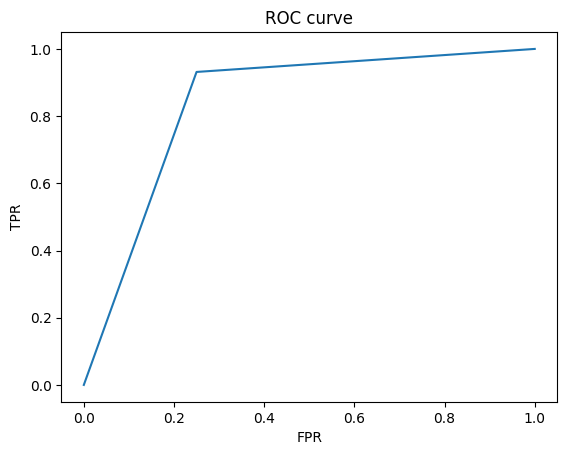

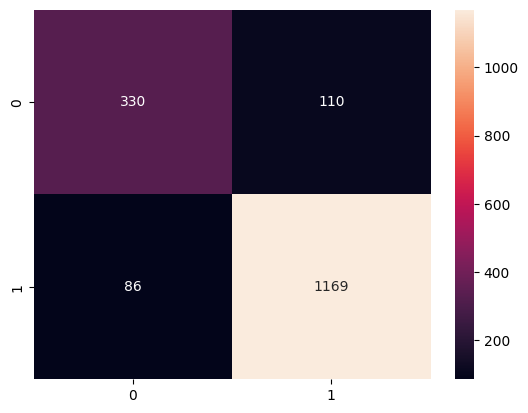

In [91]:
logreg_results1 = MLT.tune_logistic_regression(X_train_vec1, y_train1, X_test_vec1, y_test1)

In [92]:
best_logreg_model_split = logreg_results1[0]

### ___4.4. Mô hình ML - Random forest - split___

c:\Users\Nguyen_Thanh_Vinh\anaconda3\envs\RP_Env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Nguyen_Thanh_Vinh\anaconda3\envs\RP_Env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Nguyen_Thanh_Vinh\anaconda3\envs\RP_Env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Nguyen_Thanh_Vinh\anaconda3\envs\RP_Env\Lib\site-packages\sklearn\base.py", line 666, in _validat

Best hyperparameters (RandomForestClassifier): {'max_depth': 48, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 297}
Best score (RandomForestClassifier): 0.854550501257225
Best Random Forest Accuracy: 0.8513274336283185
Best Random Forest Precision: 0.9673306772908367
Best Random Forest Recall: 0.8519298245614035
Best Random Forest AUC: 0.7438926113726911
Classification Report:  RandomForestClassifier
              precision    recall  f1-score   support

           0       0.85      0.52      0.65       440
           1       0.85      0.97      0.91      1255

    accuracy                           0.85      1695
   macro avg       0.85      0.74      0.78      1695
weighted avg       0.85      0.85      0.84      1695

ROC_AUC_SCORE is  0.7438926113726911


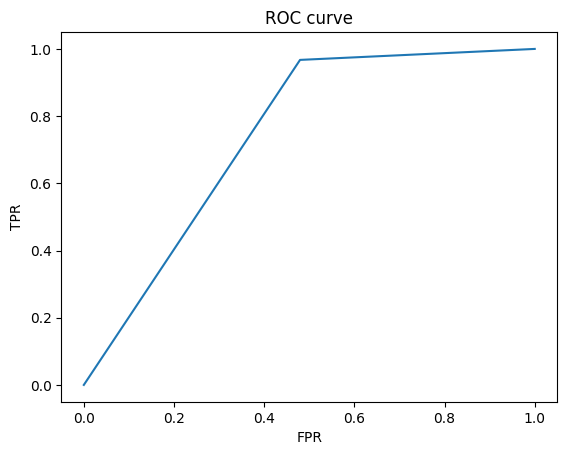

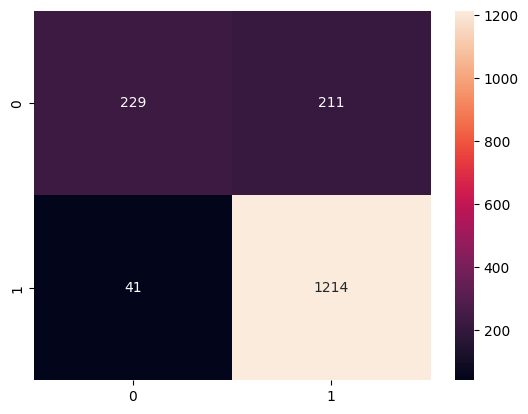

In [93]:
rf_results1 = MLT.tune_random_forest(X_train_vec1, y_train1, X_test_vec1, y_test1)

In [94]:
best_rf_model_split = rf_results1[0]

### ___4.5. Mô hình ML - NavieBayes - Split___

Best hyperparameters (MultinomialNB): {'alpha': 0.1691300328272427}
Best score (MultinomialNB): 0.8774150148581132
Best Navie Bayes Accuracy: 0.8749262536873156
Best Naive Bayes Precision: 0.9370517928286852
Best Navie Bayes Recall: 0.8983957219251337
Best Naive Bayes AUC: 0.817389532777979
Classification Report:  MultinomialNB
              precision    recall  f1-score   support

           0       0.80      0.70      0.74       440
           1       0.90      0.94      0.92      1255

    accuracy                           0.87      1695
   macro avg       0.85      0.82      0.83      1695
weighted avg       0.87      0.87      0.87      1695

ROC_AUC_SCORE is  0.817389532777979


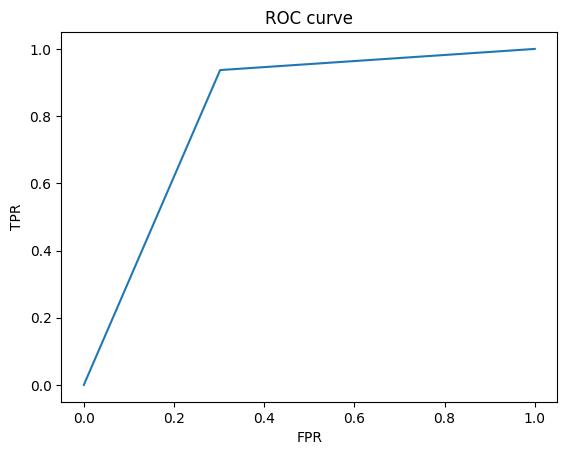

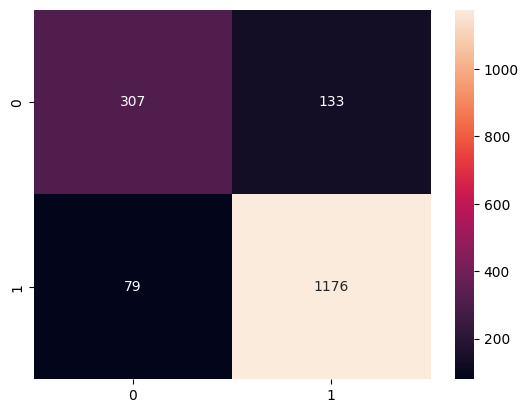

In [95]:
nb_results1 = MLT.tune_multinomial_nb(X_train_vec1, y_train1, X_test_vec1, y_test1)

In [96]:
best_nb_results_split = nb_results1[0]

### ___4.6. Mô hình DL - LSTM - Split___

In [9]:
X_train_dense = X_train_vec1.toarray()
X_test_dense = X_test_vec1.toarray()

In [10]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, GlobalAveragePooling1D, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import os

def build_model(hp):
    model = Sequential()

    model.add(Input(shape=(1020, 1)))  # Sử dụng 1020 đặc trưng làm chuỗi đầu vào

    for _ in range(hp.Int('num_lstm_layers', 1, 3)):  # Từ 1 đến 3 lớp LSTM
        model.add(LSTM(hp.Int('lstm_units', 32, 128, step=32), return_sequences=True))
        model.add(Dropout(0.5))

    model.add(GlobalAveragePooling1D())  # Tổng hợp thông tin từ các bước
    model.add(Dense(1, activation='sigmoid'))  # Phân loại nhị phân (0 hoặc 1)

    model.compile(
        loss='binary_crossentropy',  # Sử dụng loss nhị phân cho bài toán phân loại 2 lớp
        optimizer=Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
        metrics=['accuracy']
    )

    return model

# Đường dẫn và tên dự án
base_dir = r'sentiment_NK55'
project_name = 'sentiment_NLP5'
directory = os.path.join(base_dir, project_name)

# Kiểm tra và tạo thư mục nếu chưa có
if not os.path.exists(directory):
    os.makedirs(directory)
    print(f"Created directory: {directory}")
else:
    print(f"Directory already exists: {directory}")

# Tuner tìm kiếm siêu tham số
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',  # Tối ưu hóa theo độ chính xác trên tập validation
    max_trials=2,  # Số lần thử
    executions_per_trial=1,  # Mỗi thử nghiệm sẽ chạy 1 lần
    directory=base_dir,
    project_name=project_name
)

# Tiến hành tìm kiếm siêu tham số
tuner.search(X_train_dense, y_train1, epochs=5, validation_data=(X_test_dense, y_test1))

# Lấy các siêu tham số tốt nhất
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters found:")
print(f"LSTM units: {best_hps.get('lstm_units')}")
print(f"Number of LSTM layers: {best_hps.get('num_lstm_layers')}")
print(f"Learning rate: {best_hps.get('learning_rate')}")

Trial 2 Complete [00h 39m 23s]
val_accuracy: 0.7404129505157471

Best val_accuracy So Far: 0.7404129505157471
Total elapsed time: 00h 53m 31s
Best hyperparameters found:
LSTM units: 32
Number of LSTM layers: 1
Learning rate: 0.0003561970496462242


# __5. Dự đoán bộ dữ liệu testset__

In [ ]:
# Đọc bộ dữ liệu đã được xử lý
file_path2 = r'C:\\Users\\Nguyen_Thanh_Vinh\\Downloads\\NopThay\\preprocessed_test.xlsx'
df2 = pd.read_excel(file_path2)
print(df2.head())

In [98]:
# Assuming your dataframe is named 'dataset'
df2['rating'] = df2['rating'].replace(-1, 0)

In [132]:
# Assuming your dataframe is named 'df' (as in the last part of your code)
selected_columns = df2[['word_tokenize', 'rating']]
selected_columns = selected_columns.dropna(subset=['word_tokenize']).reset_index()
selected_columns

,index,word_tokenize,rating
0,0,áo sơ_mi trắng này chất lụa mặc vào mát_lạnh l...,1
1,1,chất_lượng sản_phẩm trên cả hy_vọng áo đường m...,1
2,2,đây là một trong những cửa_hàng cute nhất shop...,1
3,3,đúng với mô đẹp đương_may chắc_chắn phù_hợp ch...,1
4,4,camera mình hơi xấu nhưng_mà lần đầu_tiên mua ...,1
...,...,...,...
120,129,màu đen mà tưởng phơi nắng nửa năm chê,0
121,130,mua cái quần thì đưa cái áo_chán chẳng buồn_ng...,0
122,131,đổi cái size quần_hơi bị quằn luôn từ tới nay ...,0
123,132,tệ,0


In [134]:
X = selected_columns['word_tokenize']
y = selected_columns['rating']
X, X = apply_tfidf(X, X)

In [ ]:
# Predict using the trained models
rf_pred = best_rf_model_full.predict(X)
nb_pred = best_nb_results_full.predict(X)
lr_pred = best_logreg_model_full.predict(X)

# Print classification reports
print("Random Forest Classification Report:")
print(classification_report(selected_columns['rating'], rf_pred))

print("\nNaive Bayes Classification Report:")
print(classification_report(selected_columns['rating'], nb_pred))

print("\nLogistic Regression Classification Report:")
print(classification_report(selected_columns['rating'], lr_pred))